In [3]:
#TASK1
import pandas as pd
yearly=pd.read_csv('/content/yearly_deaths_by_clinic.csv')
print(yearly1)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [7]:
from numpy.core.numeric import binary_repr
#TASK2
yearly['proportion_deaths']=yearly['deaths']/yearly['births']
yearly1=yearly.iloc[0:6]
yearly2=yearly.iloc[6:12]
print(yearly1)


   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


<Axes: xlabel='year', ylabel='Proportion deaths'>

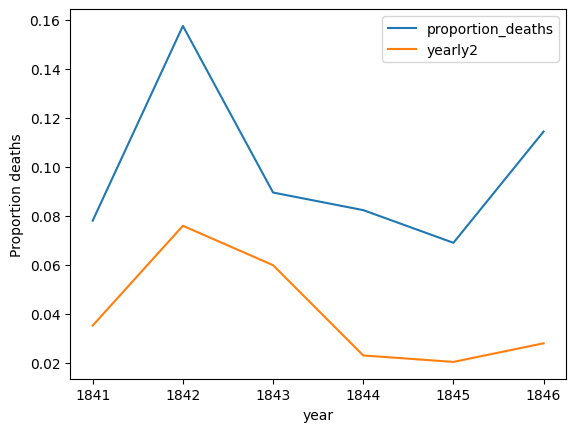

In [18]:
#TASK3
ax = yearly1.plot(x="year", y="proportion_deaths",
              ylabel="Proportion deaths")
yearly2.plot(x="year", y="proportion_deaths",
         label="yearly2", ax=ax)



In [14]:
#TASK4
monthly=pd.read_csv('/content/monthly_deaths.csv',parse_dates=['date'])
monthly['proportion_deaths']=monthly['deaths']/monthly['births']
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


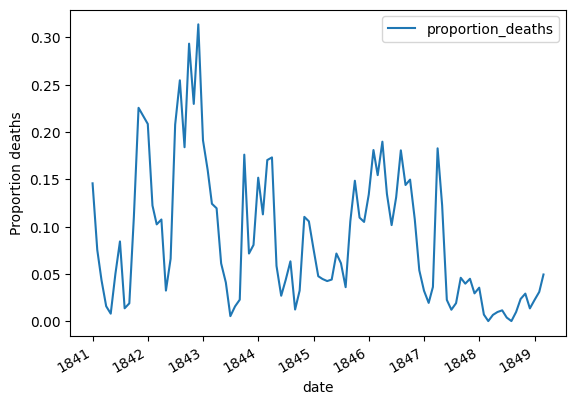

In [28]:
#TASK5
ax=monthly.plot(x='date', y='proportion_deaths', ylabel='Proportion deaths')


<Axes: xlabel='date', ylabel='Proportion deaths'>

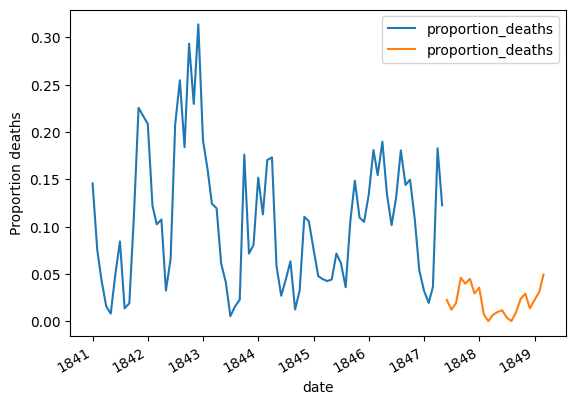

In [27]:
#TASK6
at_washing = pd.to_datetime('1847-06-01')
before_washing=monthly[monthly['date']< at_washing]
after_washing=monthly[monthly['date'] >= at_washing]
ax=before_washing.plot(x='date', y='proportion_deaths',ylabel='Proportion deaths')
after_washing.plot(x='date', y='proportion_deaths', ax=ax)



In [32]:
#TASK7
import numpy as np
before_proportion=before_washing['proportion_deaths']
after_proportion=after_washing['proportion_deaths']
mean_difference=np.mean(after_proportion)-np.mean(before_proportion)
print(mean_difference)


-0.08395660751183336


In [33]:
#TASK8
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean()) 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval


0.025   -0.100571
0.975   -0.067108
dtype: float64

In [35]:
#TASK9
Doctors_should_wash_their_hands=True
print(Doctors_should_wash_their_hands
      )

True
